## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
print(study_results["Timepoint"].count())

study_results.drop_duplicates(subset =["Mouse ID", "Timepoint"], 
                   keep = False, inplace = True) 
# Combine the data into a single dataset
complete_study_data = pd.merge(study_results,mouse_metadata, on = "Mouse ID")
# Display the data table for preview
print(study_results["Timepoint"].count())
print(complete_study_data["Timepoint"].count())
#complete_study_data.head()

1893
1883
1883


## Summary Statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
#print(complete_study_data["Drug Regimen"].value_counts())

summary_statistics_df = pd.DataFrame()
study_regimen_groups = complete_study_data.groupby("Drug Regimen")
#print(study_regimen_groups)

for name,group in study_regimen_groups:
#print(group["Tumor Volume (mm3)"].mean())
#print(group["Tumor Volume (mm3)"].median())
#print(np.var(group["Tumor Volume (mm3)"]))
#print(np.std(group["Tumor Volume (mm3)"]))    
    drug_data = {"Drug Name":name,
                 "Mean Tumor Size":group["Tumor Volume (mm3)"].mean(),
                 "Median Tumor Size":group["Tumor Volume (mm3)"].median(),
                 "Tumor Size Variance":np.var(group["Tumor Volume (mm3)"]),
                 "Tumor Size Stddev":np.std(group["Tumor Volume (mm3)"]),
                 "Tumor Size SEM": st.sem(group["Tumor Volume (mm3)"])
                }
    #print(drug_data)
    summary_statistics_df = summary_statistics_df.append(drug_data,ignore_index = True)
    
summary_statistics_df

,Drug Name,Mean Tumor Size,Median Tumor Size,Tumor Size SEM,Tumor Size Stddev,Tumor Size Variance
0,Capomulin,40.675741,41.557809,0.329346,4.983904,24.839296
1,Ceftamin,52.591172,51.776157,0.469821,6.250556,39.069446
2,Infubinol,52.884795,51.820584,0.492236,6.548770,42.886388
3,Ketapril,55.235638,53.698743,0.603860,8.257659,68.188930
4,Naftisol,54.331565,52.509285,0.596466,8.112811,65.817708
5,Placebo,54.033581,52.288934,0.581331,7.799368,60.830138
6,Propriva,52.458254,50.854632,0.540135,6.615279,43.761912
7,Ramicane,40.216745,40.673236,0.320955,4.835669,23.383692
8,Stelasyn,54.233149,52.431737,0.573111,7.689090,59.122106
9,Zoniferol,53.236507,51.818479,0.516398,6.947423,48.266689


In [3]:
# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

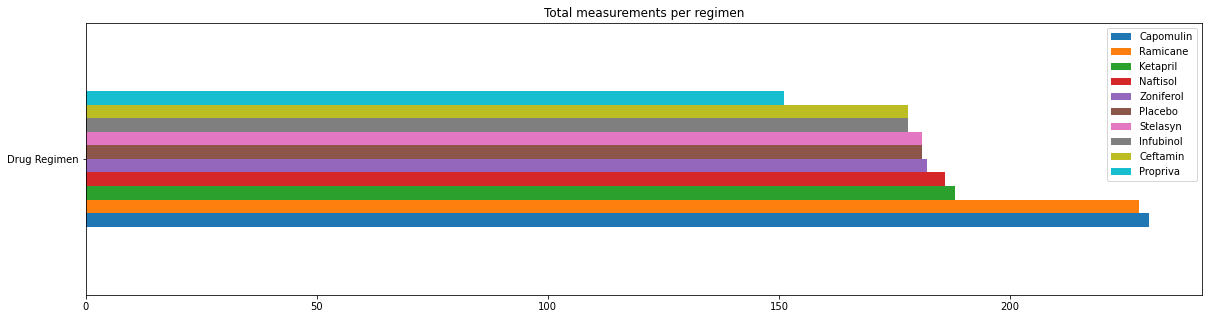

In [4]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_regimen_counts = pd.DataFrame([complete_study_data["Drug Regimen"].value_counts()])
drug_regimen_counts
drug_regimen_counts.plot(kind = "barh", figsize=(20,5))
plt.title("Total measurements per regimen")

plt.show()

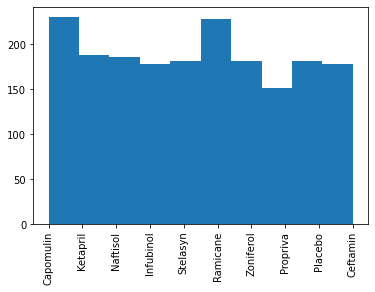

In [5]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
p = plt.hist(complete_study_data["Drug Regimen"])
plt.xticks(rotation='vertical')

plt.show()

In [6]:
#get Mouse sex counts
#group by mouseId, then get sex of each mouse
mouseId_groups = complete_study_data.groupby("Mouse ID")  
uniqueMouse_SexData = pd.DataFrame()
for name,group in mouseId_groups:
    uniqueMouse_SexData = uniqueMouse_SexData.append(group.iloc[0,5:6])

uniqueMouse_SexCount = uniqueMouse_SexData["Sex"].value_counts()
uniqueMouse_SexCount

Male      125
Female    124
Name: Sex, dtype: int64

        counts
Sex           
Male       125
Female     124


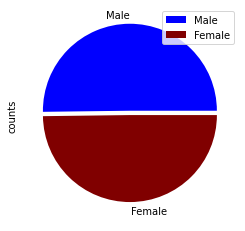

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sex_df = uniqueMouse_SexData["Sex"].value_counts().rename_axis('Sex').reset_index(name='counts')
sex_df = sex_df.set_index('Sex')
print (sex_df)
colors = ["blue","maroon"]
explode = (.05,0)
sex_df.plot(kind = "pie",y='counts',colors = colors, explode = explode)


(-1.1427447393433872,
 1.1238514752109816,
 -1.1498793479914102,
 1.1230714904449075)

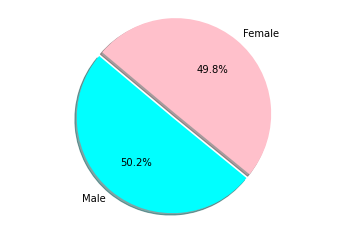

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

explode = (0.1, 0, 0, 0)
colors = ["cyan","pink"]
explode = (.05,0)
labels = ["Male", "Female"]
plt.pie(uniqueMouse_SexCount,colors = colors,labels = labels,  explode = explode,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")


## Quartiles, Outliers and Boxplots

In [9]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
promisingDrug_data = complete_study_data[complete_study_data["Drug Regimen"].isin(['Capomulin', 'Ramicane', 'Infubinol','Ceftamin','Placebo'])]
complete_response_data_df = pd.DataFrame()
Regimen_groups = promisingDrug_data.groupby("Drug Regimen")
for name,group in Regimen_groups:
    #print(">>>" + name)
    Mouse_groups = group.groupby("Mouse ID")
    for name,group in Mouse_groups:
            #print(name)
            #capture the max Timepoint for each mouse - some did not complete the study
            #finalTumor size = tumor Vol where timepoint.max
            maxTimepoint = group["Timepoint"].max()
            finalTumorSizeRow = group.loc[group["Timepoint"] == maxTimepoint]
            finalTumorSize = finalTumorSizeRow.iloc[0]['Tumor Volume (mm3)']
#             mouse_response_data = {"Mouse ID":name,
#                  "Tumor Volume (mm3)":finalTumorSize,
#                  "Timepoint":maxTimepoint,
#                  "Drug Regimen":group["Drug Regimen"].iloc[0]
#                 } 
      
            #complete_response_data_df = complete_response_data_df.append(mouse_response_data,ignore_index = True)    
            complete_response_data_df = complete_response_data_df.append(finalTumorSizeRow.iloc[0],ignore_index = True)    
    

# Start by getting the last (greatest) timepoint for each mouse

# complete_response_data_df["Timepoint"].value_counts()
# complete_response_data_df.loc[complete_response_data_df['Drug Regimen'] == 'Placebo',:]
complete_response_data_df

,Age_months,Drug Regimen,Metastatic Sites,Mouse ID,Sex,Timepoint,Tumor Volume (mm3),Weight (g)
0,9.0,Capomulin,2.0,b128,Female,45.0,38.982878,22.0
1,7.0,Capomulin,0.0,b742,Male,45.0,38.939633,21.0
2,16.0,Capomulin,0.0,f966,Male,20.0,30.485985,17.0
3,3.0,Capomulin,1.0,g288,Male,45.0,37.074024,19.0
4,22.0,Capomulin,2.0,g316,Female,45.0,40.159220,22.0
...,...,...,...,...,...,...,...,...
120,1.0,Ramicane,0.0,s508,Male,45.0,30.276232,17.0
121,18.0,Ramicane,3.0,u196,Male,45.0,40.667713,25.0
122,5.0,Ramicane,0.0,w678,Female,5.0,43.166373,24.0
123,19.0,Ramicane,0.0,y449,Male,15.0,44.183451,24.0


      Tumor Volume (mm3)
0.25           32.377357
0.50           38.125164
0.75           40.159220
The IQR for Capomulin is 7.781863460000004mm
Outliers would be smaller than 26.45236920999999mm or larger than 49.797959590000005mm.
      Tumor Volume (mm3)
0.25           48.722078
0.50           59.851956
0.75           64.299830
The IQR for Ceftamin is 15.577752179999997mm
Outliers would be smaller than 36.48532725mm or larger than 83.21858379mm.
      Tumor Volume (mm3)
0.25           54.048608
0.50           60.165180
0.75           65.525743
The IQR for Infubinol is 11.477135160000003mm
Outliers would be smaller than 42.94947772mm or larger than 77.3808832mm.
      Tumor Volume (mm3)
0.25           52.942902
0.50           62.030594
0.75           68.134288
The IQR for Placebo is 15.191386480000006mm
Outliers would be smaller than 39.24351391999999mm or larger than 84.81767336000001mm.
      Tumor Volume (mm3)
0.25           31.560470
0.50           36.561652
0.75           40.659

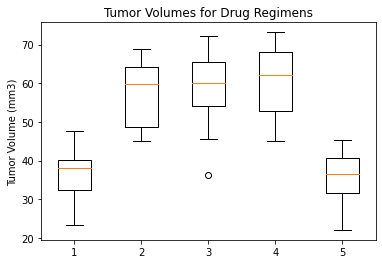

In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin','Placebo']

# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.    
# Locate the rows which contain mice on each drug and get the tumor volumes
volume_arrays = []
drug_response_groups = complete_response_data_df.groupby("Drug Regimen")  
x_axis = np.arange(0, len(drug_response_groups), 1) + 1
fig1, (ax1) = plt.subplots()    
ax1.set_title('Tumor Volumes for Drug Regimens')
ax1.set_ylabel('Tumor Volume (mm3)')

for name,group in drug_response_groups:
    volumes = group["Tumor Volume (mm3)"]
    volume_arrays.append(volumes)
    temp_df = pd.DataFrame(group,columns=['Tumor Volume (mm3)'])
    quants = temp_df.quantile([.25,.5,.75],axis = 0)
    print(quants)
    IQR = quants.iloc[2,0] - quants.iloc[0,0]
    print(f"The IQR for {name} is {IQR}mm")
    low_outlier = quants.iloc[1,0]- (IQR * 1.5)
    high_outlier = quants.iloc[1,0] + (IQR * 1.5)
    print(f"Outliers would be smaller than {low_outlier}mm or larger than {high_outlier}mm.")

    # Determine outliers using upper and lower bounds

ax1.boxplot(volume_arrays)
plt.show()

     Age_months Drug Regimen  Metastatic Sites Mouse ID     Sex  Timepoint  \
0           9.0    Capomulin               2.0     b128  Female       45.0   
1           7.0    Capomulin               0.0     b742    Male       45.0   
3           3.0    Capomulin               1.0     g288    Male       45.0   
4          22.0    Capomulin               2.0     g316  Female       45.0   
5           1.0    Capomulin               1.0     i557  Female       45.0   
..          ...          ...               ...      ...     ...        ...   
116        20.0     Ramicane               2.0     q597    Male       45.0   
118         9.0     Ramicane               1.0     r811    Male       45.0   
120         1.0     Ramicane               0.0     s508    Male       45.0   
121        18.0     Ramicane               3.0     u196    Male       45.0   
124        11.0     Ramicane               0.0     z578    Male       45.0   

     Tumor Volume (mm3)  Weight (g)  
0             38.982878  

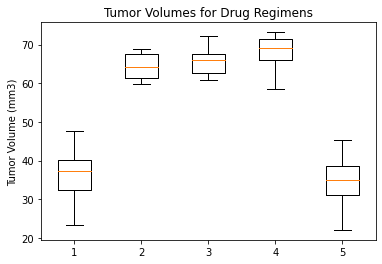

In [19]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin','Placebo']

# Create empty list to fill with tumor vol data (for plotting)
complete_response_data_without_droppouts_df = complete_response_data_df.loc[complete_response_data_df["Timepoint"] == 45]
print(complete_response_data_without_droppouts_df)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin','Placebo']

# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.    
# Locate the rows which contain mice on each drug and get the tumor volumes
volume_arrays = []
drug_response_groups = complete_response_data_without_droppouts_df.groupby("Drug Regimen")  
x_axis = np.arange(0, len(drug_response_groups), 1) + 1
fig1, (ax1) = plt.subplots()    
ax1.set_title('Tumor Volumes for Drug Regimens')
ax1.set_ylabel('Tumor Volume (mm3)')

for name,group in drug_response_groups:
    volumes = group["Tumor Volume (mm3)"]
    volume_arrays.append(volumes)
    temp_df = pd.DataFrame(group,columns=['Tumor Volume (mm3)'])
    quants = temp_df.quantile([.25,.5,.75],axis = 0)
    print(quants)
    IQR = quants.iloc[2,0] - quants.iloc[0,0]
    print(f"The IQR for {name} is {IQR}mm")
    low_outlier = quants.iloc[1,0]- (IQR * 1.5)
    high_outlier = quants.iloc[1,0] + (IQR * 1.5)
    print(f"Outliers would be smaller than {low_outlier}mm or larger than {high_outlier}mm.")

    # Determine outliers using upper and lower bounds

ax1.boxplot(volume_arrays)
plt.show()

In [12]:
# Generate a SINGLE box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

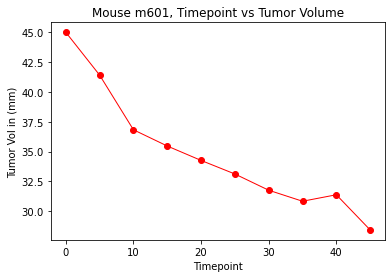

In [13]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mice_df = pd.DataFrame(complete_study_data.loc[complete_study_data['Drug Regimen'] == "Capomulin"] )
capomulin_mice_df
#use m601 as an example
m601_data = pd.DataFrame(capomulin_mice_df.loc[capomulin_mice_df['Mouse ID'] == 'm601' ])
m601_data
plt.title("Mouse m601, Timepoint vs Tumor Volume")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Vol in (mm)")



plt.plot(m601_data["Timepoint"], m601_data["Tumor Volume (mm3)"], marker="o", color="red", linewidth=1)
plt.show()

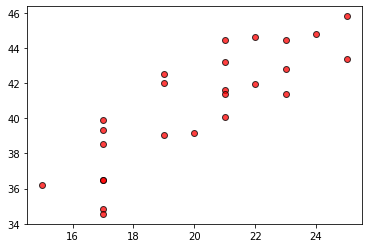

In [14]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_mice_df
#
mouse_weight_tumorVol = pd.DataFrame()
mouse_measurement_groups = capomulin_mice_df.groupby("Mouse ID") 
for name,group in mouse_measurement_groups:
    singleMouse_data = {"Mouse ID":name, "Mean Tumor Size":group["Tumor Volume (mm3)"].mean(),"Weight (g)":group["Weight (g)"].iloc[0]}
    mouse_weight_tumorVol = mouse_weight_tumorVol.append(singleMouse_data,ignore_index = True)
     
mouse_weight_tumorVol

plt.scatter(mouse_weight_tumorVol["Weight (g)"], mouse_weight_tumorVol["Mean Tumor Size"], marker="o", facecolors="red", edgecolors="black",
             alpha=0.75)

## Correlation and Regression

In [15]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
